# Medidas de Tendencia Central

### Media

La media es la suma de todos los elementos $x_i$ de un conjunto $X$, divididos entre el número total de elementos $n$.
$$\\\sum_i^n x_i / n$$

In [3]:
#Función de la media
def media(data):
    return float(sum(data)) / float(len(data))

### Mediana

Es el número intermedio de un grupo de números, es decir, la mitad de los números son superiores a la mediana y la mitad de los números tienen valores menores que la mediana.

In [4]:
#Función de la mediana
def mediana(data):
    ordenados = sorted(data)
    medio = len(ordenados) // 2
    #Si el número de datos es impar, devolvemos el valor de en medio
    if len(data) % 2 != 0:
        return ordenados[medio]
    #Entonces el número de datos es par, devolvemos el promedio
    return (ordenados[medio - 1] + ordenados[medio]) / 2

### Moda

Es el valor que tiene mayor frecuencia absoluta.

In [5]:
#Función de la moda
def moda(data):
    diccionario = []
    max = 0
    temp = 0
    for value in range(0, len(data)):
        temp = data.count(data[value])
        if(temp == max and data[value] not in diccionario):
            diccionario.append(data[value])
        if(temp > max):
            max = temp
            diccionario = []
            diccionario.append(data[value])

    return diccionario

# Medidas de dispersión

### Varianza

Representa la variabilidad de una serie de datos con respecto a su media.

In [6]:
#Función de varianza
#muestral: true para cálculo muestral, false para cálculo poblacional 
def varianza(data, muestral):
    xbarra = media(data)
    numeradores = data.copy()

    for i in range(0, len(numeradores)):
        numeradores[i] = pow(numeradores[i] - xbarra, 2)

    if(muestral):
        return float(sum(numeradores)) / float((len(numeradores) - 1))
    else:
        return float(sum(numeradores)) / float(len(numeradores))

### Desviación estándar

Indica qué ta dispersos están los datos con respecto a la media y con la misma unidad de medida que los datos.

In [7]:
#Función para la desviación estándar
#muestral: true para cálculo muestral, false para cálculo poblacional 
def desv_standar(data, muestral):
    return pow(varianza(data, muestral), 0.5)

### Sesgo

Indica la diferencia entre el valor del estimador esperado y el estimador real.

In [8]:
#Función Sesgo de la Media
#muestral: true para cálculo muestral, false para cálculo poblacional 
def media_sesgo(data, muestral):    
    numeradores = data.copy()
    xbarra = media(numeradores)

    for i in range(0, len(data)):
        numeradores[i] = pow(numeradores[i] - xbarra, 3) * len(numeradores)

    return sum(numeradores) / ((len(numeradores) - 1) * (len(data) - 2) * pow(desv_standar(numeradores, muestral), 3))

### Cuantiles

Son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria. Normalmente se suelen dividir en 4 (cuartiles), 100 (percentiles)

In [9]:
#Función de cuantiles: 
#q es el cuantil por el que quieres partir (4, 10, 100 ,..., n)
#ntil es el cuantil que quieres visualizar, si pones 0, regresa todos los cuantiles
def cuantiles(data, q, ntil):
    ordenados = data.copy()
    ordenados = sorted(ordenados)
    cuantiles = {}

    if(q < ntil):
        return 'Error: la q debe ser igual o mayor al ntil que ocupas'

    for i in range(1, q + 1):
        rango = (float(i) / float(q)) * (len(data) - 1)
        rango_int = int(rango)
        rango_dec = rango % 1

        if rango_dec:
            cuantiles[i] = ordenados[rango_int] + rango_dec * (ordenados[rango_int + 1] - ordenados[rango_int])
        else:
            cuantiles[i] = ordenados[rango_int]

    if ntil == 0:
        return cuantiles
    else:
        return cuantiles[ntil]


### Ejemplos

A continuación, se pondrá una temperatura cualquiera de datos y se mostrará el funcionamiento de las funciones previamente realizadas.

In [10]:
lista = [2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1, 2, 2, 9, 10, 11, 24, 1]

print("Media: " + str(media(lista)))
print("Mediana: " + str(mediana(lista)))
print("Moda: " + str(moda(lista)))
print("Varianza Muestral: " + str(varianza(lista, True)))
print("Varianza Poblacional: " + str(varianza(lista, False)))
print("Desviación estándar Muestral: " + str(desv_standar(lista, True)))
print("Desviación estándar Poblacional: " + str(desv_standar(lista, False)))
print("Sesgo con respecto a la media muestral: " + str(media_sesgo(lista, True)))
print("Sesgo con respecto a la media poblacional: " + str(media_sesgo(lista, False)))
print("Cuartiles: " + str(cuantiles(lista, 4, 0)))


Media: 8.428571428571429
Mediana: 9.0
Moda: [2]
Varianza Muestral: 57.73544973544972
Varianza Poblacional: 55.673469387755084
Desviación estándar Muestral: 7.598384679354535
Desviación estándar Poblacional: 7.461465632686053
Sesgo con respecto a la media muestral: 7.419526283702451e-12
Sesgo con respecto a la media poblacional: 7.835515578945387e-12
Cuartiles: {1: 2.0, 2: 9.0, 3: 11.0, 4: 24}


In [11]:
def Analisis_Descriptivo(lista):
    print("Media: " + str(media(lista)))
    print("Mediana: " + str(mediana(lista)))
    print("Moda: " + str(moda(lista)))
    print("Varianza Muestral: " + str(varianza(lista, True)))
    print("Varianza Poblacional: " + str(varianza(lista, False)))
    print("Desviación estándar Muestral: " + str(desv_standar(lista, True)))
    print("Desviación estándar Poblacional: " + str(desv_standar(lista, False)))
    print("Sesgo con respecto a la media muestral: " + str(media_sesgo(lista, True)))
    print("Sesgo con respecto a la media poblacional: " + str(media_sesgo(lista, False)))
    print("Cuartiles: " + str(cuantiles(lista, 4, 0)))

# Estadísticos descriptivos de la generación de energía de una Planta Solar en México

Una vez elegido el set de datos, hablaremos de cada una de las variables que analizaremos a lo largo del curso.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [30]:
def line_plotting(title, data, x, y, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='blue')    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [31]:
def bar_plotting(title, data, x, y, x_label, y_label, width, height):
    plt.figure(figsize=(width,height))
    plt.bar(data[x], data[y], color='blue')    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [42]:
def hist_plotting(title, data, x_label, y_label, width, height):
    plt.figure(figsize=(width,height))
    plt.hist(data.values, color='lightblue')
    plt.axvline(
        x = data.values.mean(),
        c = '#ff0000',
        label = '$\\bar{x}$'
    )    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Limpio.xlsx")
datosGeneracion.head()

,Fecha,Anio,Mes,NumMes,Dia,NumDia,Hora,NumHora,Generacion,Temperatura,...,DireccionViento,CoberturaNubes,IndiceUV,CodCondCielo,DesCondCielo,CodDirViento,DesDirViento,VelocidadRafaga,Precipitacion,DPT
0,2021-07-01 00:00:00,2021,199,7,6026,1,144600,0,0.0,19.0,...,0.0,70,0,4,Cielo nublado,4,Sureste,17.0,0.0,15.0
1,2021-07-01 01:00:00,2021,199,7,6026,1,144601,1,0.0,18.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,15.0,0.0,15.0
2,2021-07-01 02:00:00,2021,199,7,6026,1,144602,2,0.0,18.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,15.0
3,2021-07-01 03:00:00,2021,199,7,6026,1,144603,3,0.0,18.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,16.0
4,2021-07-01 04:00:00,2021,199,7,6026,1,144604,4,0.0,17.0,...,0.0,70,0,2,Poco nuboso,4,Sureste,11.0,0.0,14.0


### Fechas

Antes de iniciar con las columnas consideradas como variables, debo comentar que hay un conjunto de columnas que se consideran "fechas", en el sentido que no se analizarán como tal, sino que serán eje o auxiliares en el análisis como series de tiempo tanto de las variables dependientes, como de las independientes. Estas columnas son:

- **Fecha**: Columna DateTime con formato yyyy-MM-dd HH:mm:ss
- **Anio**: Columna con el número de año de la observación
- **Mes**: Código de mes (iniciando en 199, que es Julio en la Base de Datos origen), que es secuencial ascendente.
- **NumMes**: Número del mes que representa en el año (Ej: 7 = Julio)
- **Dia**: Código del día iniciando por el día 6026, proviene de la base de datos origen, de manera secuencial ascendente.
- **NumDia**: Número del Día que representa en el mes (del 1 al 31)
- **Hora**: Código de la hora iniciando con 144600, proviene de la base de datos origen, de manera secuencial ascendente.
- **NumHora**: Número de la Hora que representa en el día (del 0 al 23)

### Generación

Variable dependiente que representa la cantidad de kWh que generaron los paneles solares en cada hora (observación) durante un periodo de 2 años. Esta variable es la que analizaremos y predeciremos el comportamiento. A continuación se muestra la gráfica con 240 observaciones para una mejor apreciación del comportamiento.

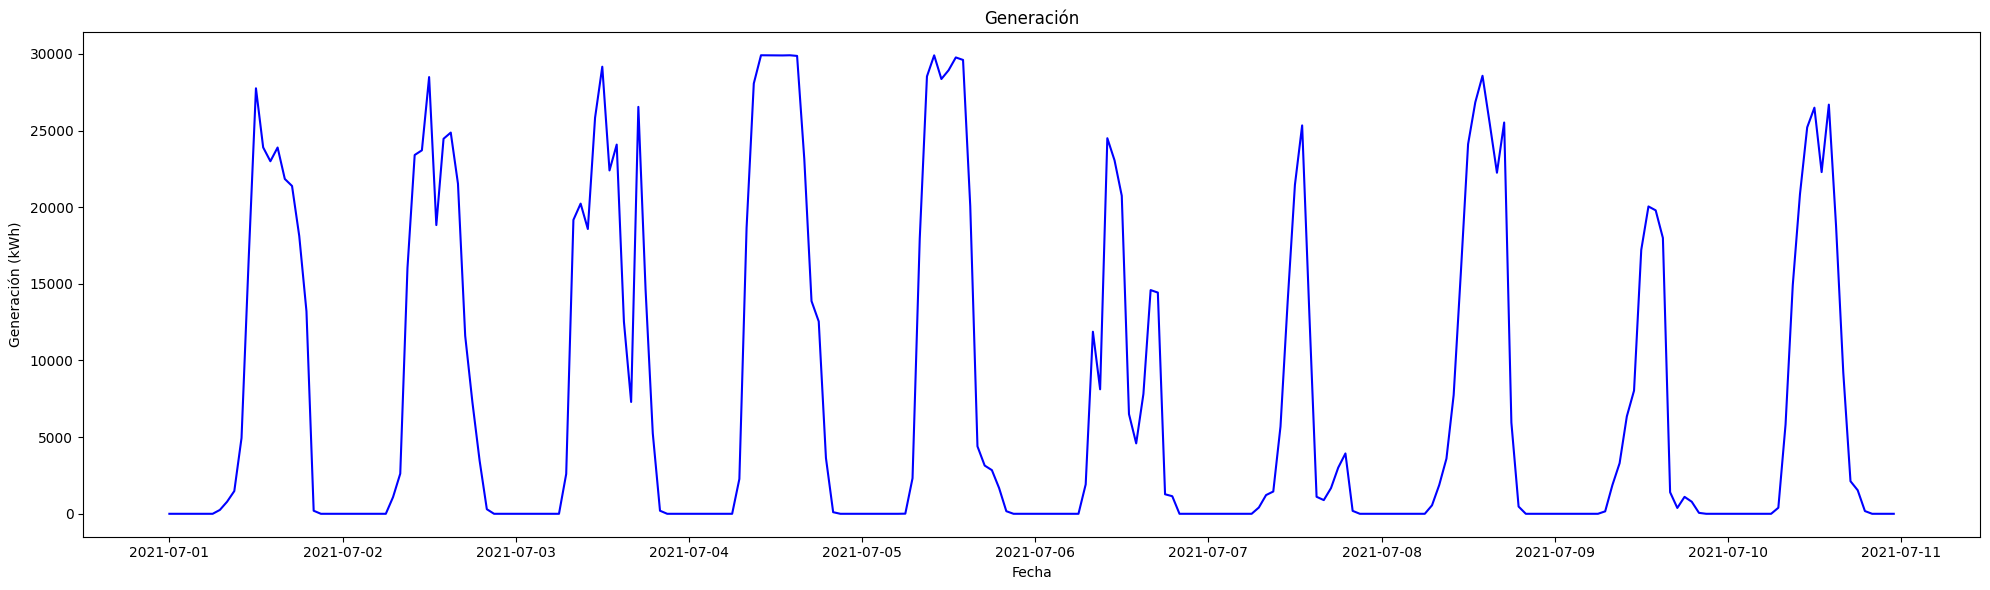

In [24]:
#Graficaremos 240 horas para una mejor apreciac
line_plotting('Generación', datosGeneracion[:240], 'Fecha', 'Generacion', 'Fecha', 'Generación (kWh)', 20, 6)

Como podemos observar, esta variable tiene un comportamiento cíclico y repetitivo por día, ya que en las horas más altas del día, se presenta una mayor generación que durante la noche. Para eliminar este comportamiento, usaremos el método diferencial, el cuál restaremos cada valor con su anterior del ciclo inmediato.

In [20]:
datosGeneracion["Generacion_diff"] = datosGeneracion["Generacion"].diff(periods=24)

Ahora vamos a graficarlo.

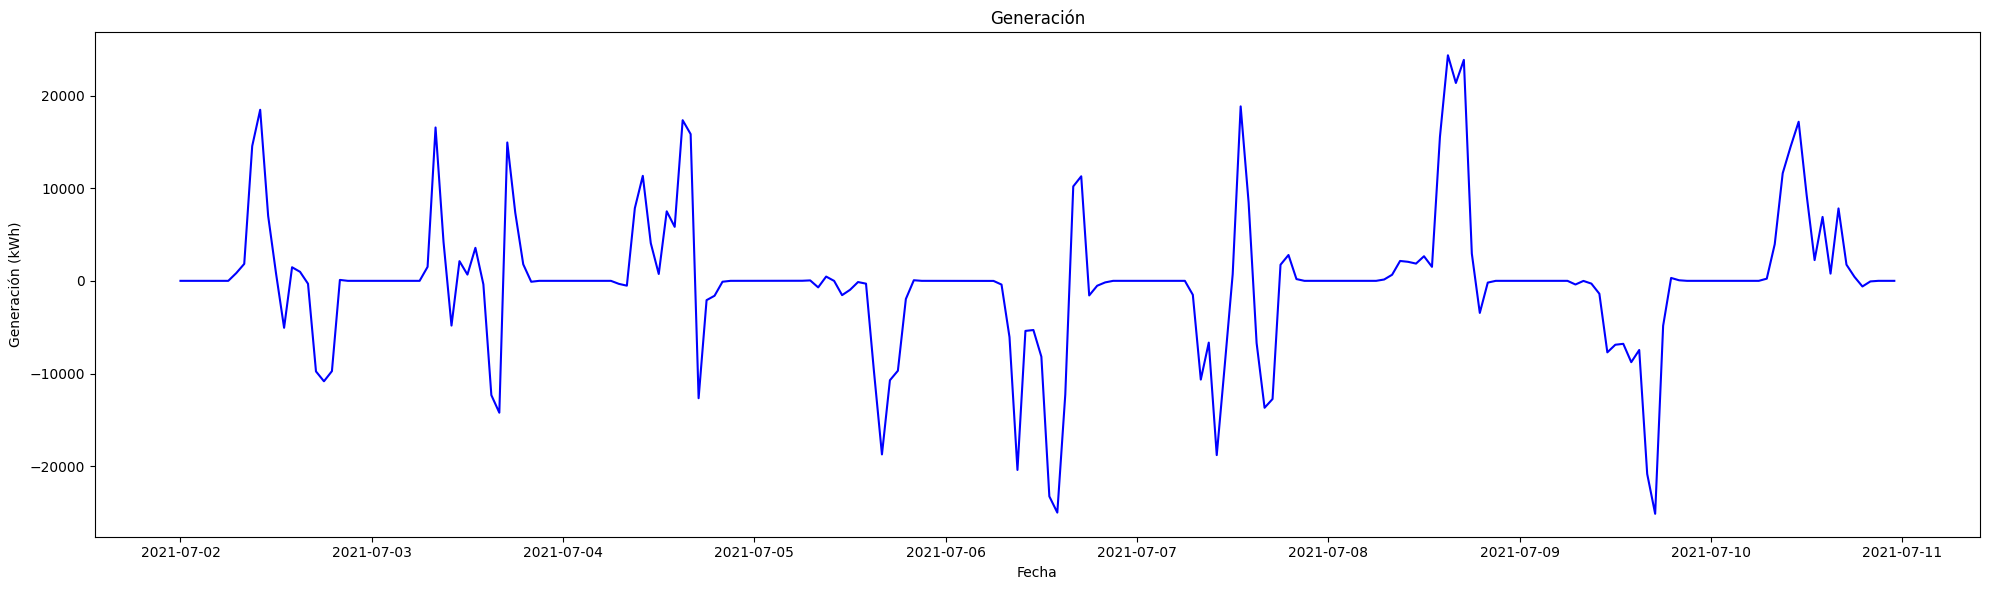

In [21]:
#Graficaremos 240 horas para una mejor apreciación
line_plotting('Generación', datosGeneracion[:240], 'Fecha', 'Generacion_diff', 'Fecha', 'Generación (kWh)', 20, 6)

Con esto se elimina el ciclo diario y podemos evaluar la correlación de esta variable con sus variables independientes. Se aprecia mejor observando la gráfica completa.

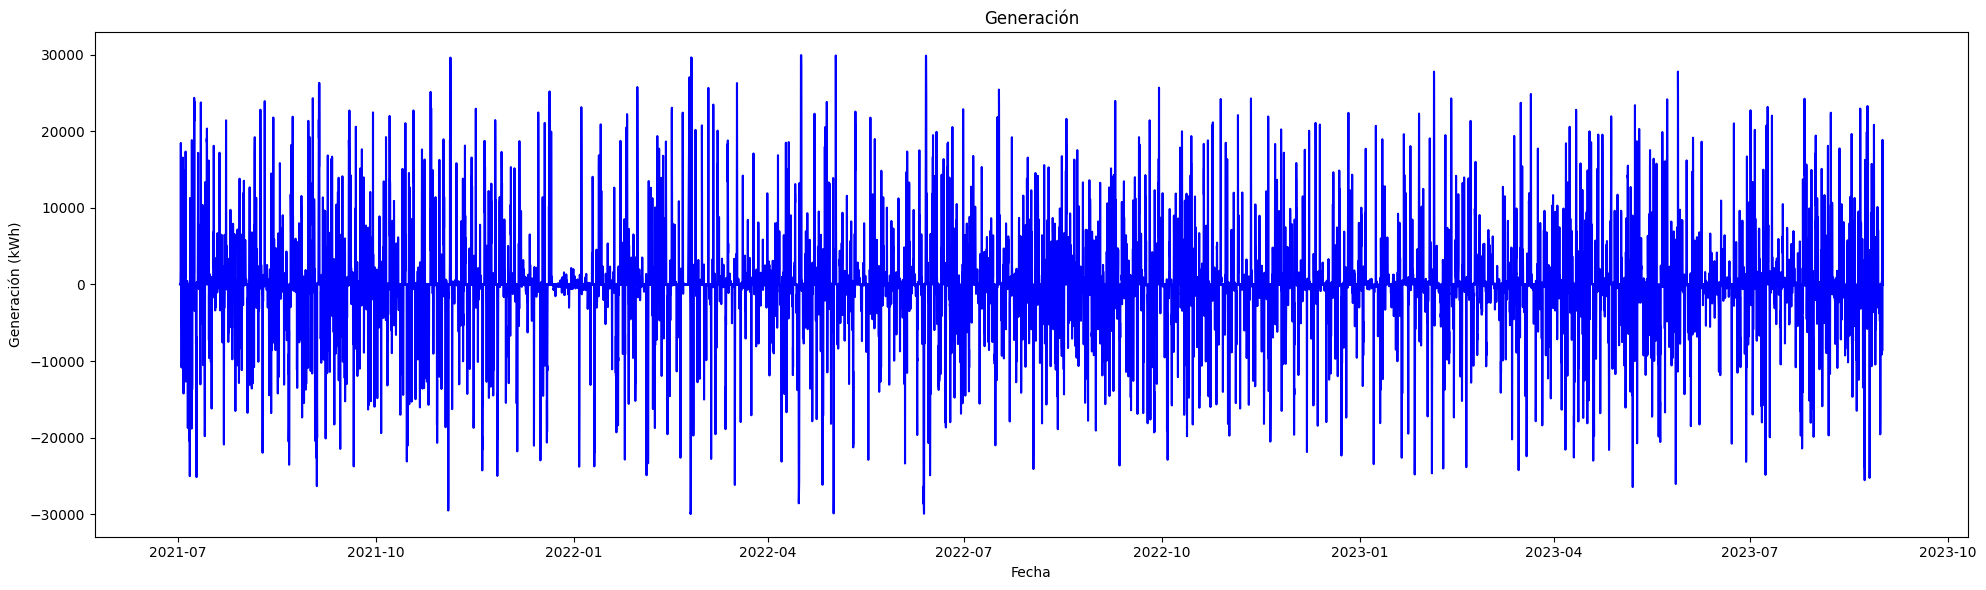

In [25]:
line_plotting('Generación', datosGeneracion, 'Fecha', 'Generacion_diff', 'Fecha', 'Generación (kWh)', 20, 6)

Se muestran ahora las mediciones descriptivas:

In [29]:
Analisis_Descriptivo(datosGeneracion['Generacion'].to_list())

Media: 9748.432925108207
Mediana: 371.2202
Moda: [0.0]
Varianza Muestral: 146205533.75508687
Varianza Poblacional: 146197816.79458043
Desviación estándar Muestral: 12091.548029722533
Desviación estándar Poblacional: 12091.228919947733
Sesgo con respecto a la media muestral: 5.619377629311374e-39
Sesgo con respecto a la media poblacional: 5.619822558193598e-39
Cuartiles: {1: 0.0, 2: 371.2202, 3: 23559.494075000002, 4: 29966.1386}


### Temperatura

Esta columna es numérica y representa la temperatura ambiental presentada durante la observación (hora).

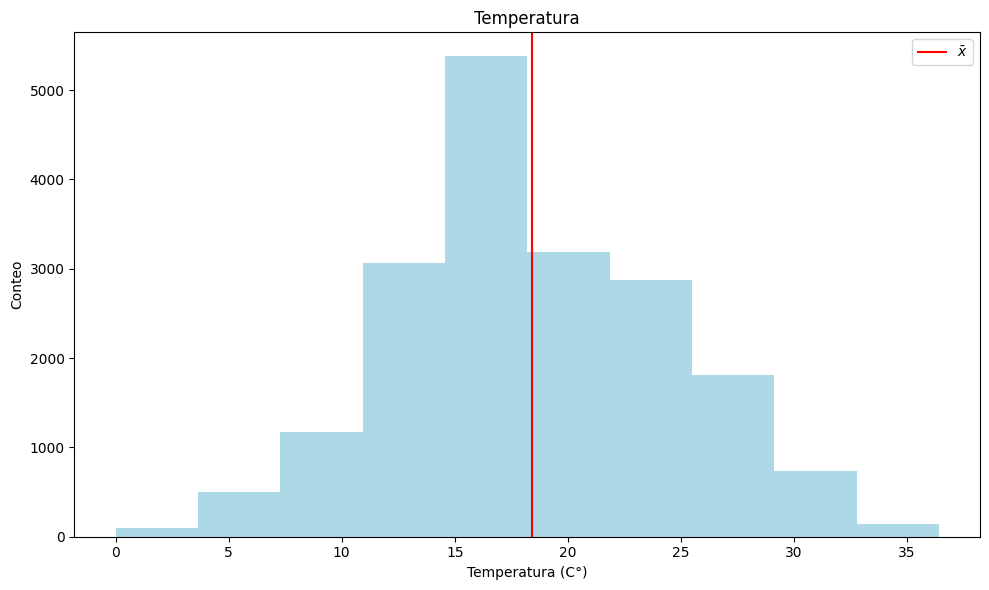

Media: 18.43295682465961
Mediana: 18.0
Moda: [17.0]
Varianza Muestral: 36.75997792339338
Varianza Poblacional: 36.75803767331825
Desviación estándar Muestral: 6.063000735889233
Desviación estándar Poblacional: 6.0628407263689725
Sesgo con respecto a la media muestral: 1.1486762470607673e-20
Sesgo con respecto a la media poblacional: 1.1487671964990074e-20
Cuartiles: {1: 14.4, 2: 18.0, 3: 22.9, 4: 36.4}


In [44]:
hist_plotting('Temperatura', datosGeneracion['Temperatura'], 'Temperatura (C°)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['Temperatura'].to_list())

La Temperatura parece tener el comportamiento de una distribución normal, puesto que el promedio se encuentra en el centro y es donde se encuentra la mayor distribución de los datos.

### Probabilidad de Lluvia

Esta columna es numérica y representa la probabilidad del 0 al 100 de que llueva en la ciudad donde se encuentra la planta solar.

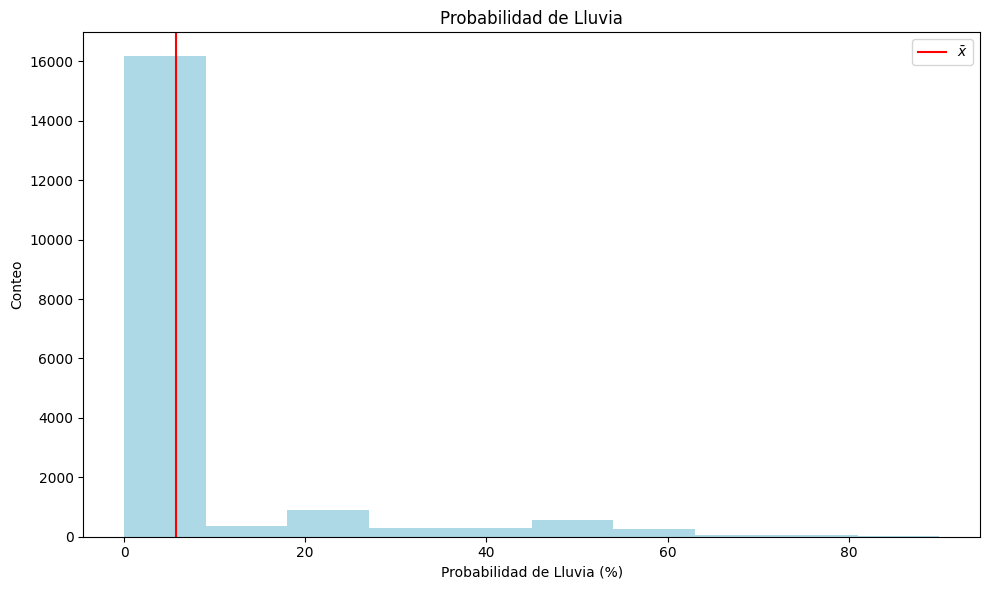

Media: 5.754090573208065
Mediana: 0.0
Moda: [0]
Varianza Muestral: 191.1403171275928
Varianza Poblacional: 191.13022843778347
Desviación estándar Muestral: 13.825350524583193
Desviación estándar Poblacional: 13.824985657778582
Sesgo con respecto a la media muestral: 2.3882963747691918e-23
Sesgo con respecto a la media poblacional: 2.3884854743646515e-23
Cuartiles: {1: 0.0, 2: 0.0, 3: 2.0, 4: 90}


In [45]:
hist_plotting('Probabilidad de Lluvia', datosGeneracion['ProbabilidadLluvia'], 'Probabilidad de Lluvia (%)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['ProbabilidadLluvia'].to_list())

Los datos aparentemente pueden representar una distribución exponencial, ya que tanto la media como la moda de los datos se encuentran casi en el extremo, indicando que en la mayor parte del tiempo en la ciudad de la planta, no existe una probabilidad de lluvia, lo cual es bueno, considerando que se necesita sol para una buena generación energética.

### Humedad Relativa

Esta columna es numérica y representa el porcentaje del 0 al 100 de la humedad relativa que se presenta en la planta.

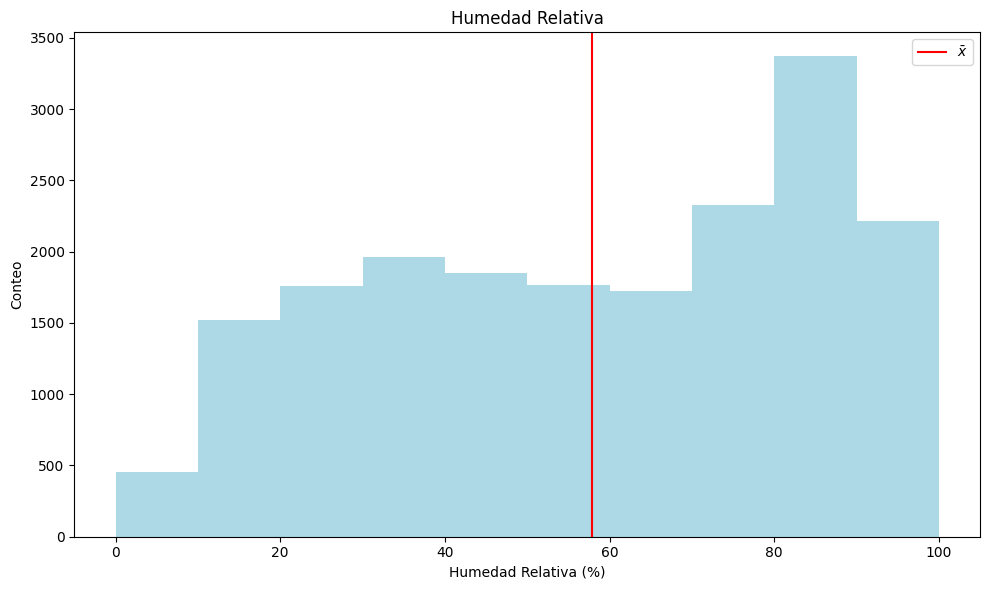

Media: 57.84229916605094
Mediana: 60.0
Moda: [100.0]
Varianza Muestral: 725.2362977803507
Varianza Poblacional: 725.1980186555866
Desviación estándar Muestral: 26.930211617815978
Desviación estándar Poblacional: 26.929500898746465
Sesgo con respecto a la media muestral: -1.063828982184049e-23
Sesgo con respecto a la media poblacional: -1.0639132136187635e-23
Cuartiles: {1: 35.0, 2: 60.0, 3: 82.0, 4: 100.0}


In [46]:
hist_plotting('Humedad Relativa', datosGeneracion['HumedadRelativa'], 'Humedad Relativa (%)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['HumedadRelativa'].to_list())

Las observaciones que se muestran se ven muy uniformes, por lo que indica que en la ciudad donde se encuentra la planta puede haber humedad o no, solo con ver esta variable por sí sola, puedo saber que es probable que no sirva para el análisis del modelo completo, más no sacaremso conclusiones prematuras hasta analizar todas las variables en conjunto.

### Velocidad del Viento

Esta columna es numérica y representa la velocidad en $\frac{km}{h}$ del viento.

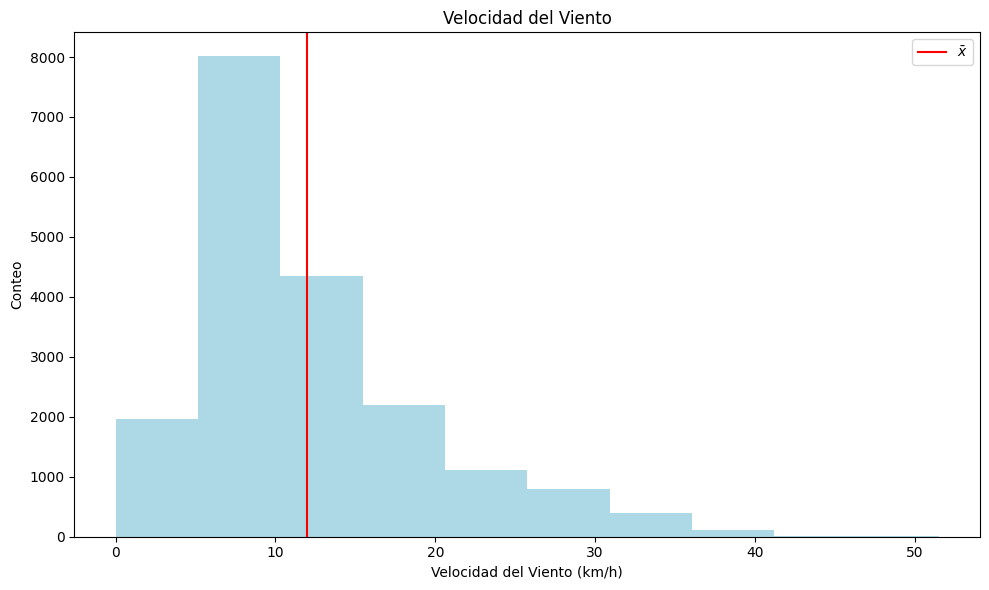

Media: 11.975530454977337
Mediana: 9.4
Moda: [7.0]
Varianza Muestral: 54.79093987431623
Varianza Poblacional: 54.78804792140404
Desviación estándar Muestral: 7.402090236839607
Desviación estándar Poblacional: 7.401894887216654
Sesgo con respecto a la media muestral: 5.143502737339563e-21
Sesgo con respecto a la media poblacional: 5.143909987585872e-21
Cuartiles: {1: 7.0, 2: 9.4, 3: 15.1, 4: 51.5}


In [47]:
hist_plotting('Velocidad del Viento', datosGeneracion['VelocidadViento'], 'Velocidad del Viento (km/h)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['VelocidadViento'].to_list())

Con la gráfica podemos ver que aparenta ser una distribución Weibull, ya que la media y la moda se encuentran sesgados hacia un lado y no hacia el centro de los datos. En general en la Ciudad se observa poca velocidad del viento, lo cual permite que el panel reciba mejor la radiación.

### Dirección del Viento

Esta columna es numérica y va de 0 a 360 grados, donde el Norte es 0 grados y el Sur 180, que representa la dirección en grados del viento.

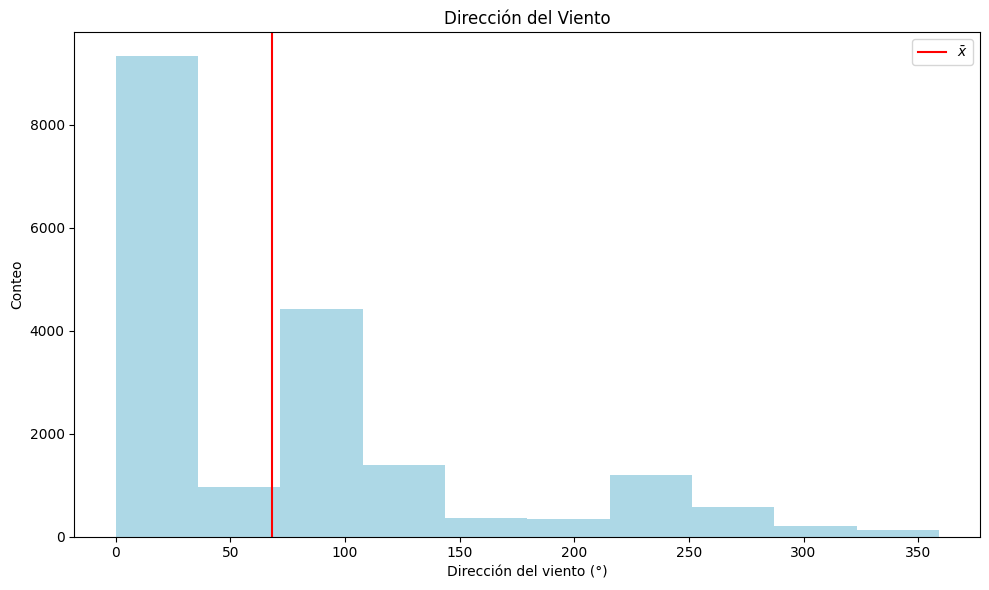

Media: 68.35927372532461
Mediana: 47.0
Moda: [0.0]
Varianza Muestral: 7168.342714996305
Varianza Poblacional: 7167.964358471709
Desviación estándar Muestral: 84.66606590007773
Desviación estándar Poblacional: 84.66383146581371
Sesgo con respecto a la media muestral: 5.016417780309576e-27
Sesgo con respecto a la media poblacional: 5.016814968272904e-27
Cuartiles: {1: 0.0, 2: 47.0, 3: 102.0, 4: 359.0}


In [48]:
hist_plotting('Dirección del Viento', datosGeneracion['DireccionViento'], 'Dirección del viento (°)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['DireccionViento'].to_list())

La gráfica indica que durante la mayor parte del tiempo la dirección del Viento va al Norte, que igual podemos comparar con la variable categórica de la dirección del viento, de la cual hablaremos más adelante. En este caso la media está movida porque la gama de opciones es más amplia.

### Categórica de Dirección del Viento

Para este caso, hay dos columnas que representan este dato, uno es donde se muestra la descripción y otro del código que lo identifica. A continuación indico la simbología:

1. Norte
2. Noreste
3. Este
4. Sureste
5. Sur
6. Suroeste
7. Oeste
8. Noroeste
9. Sin Dirección (Caso atípico)

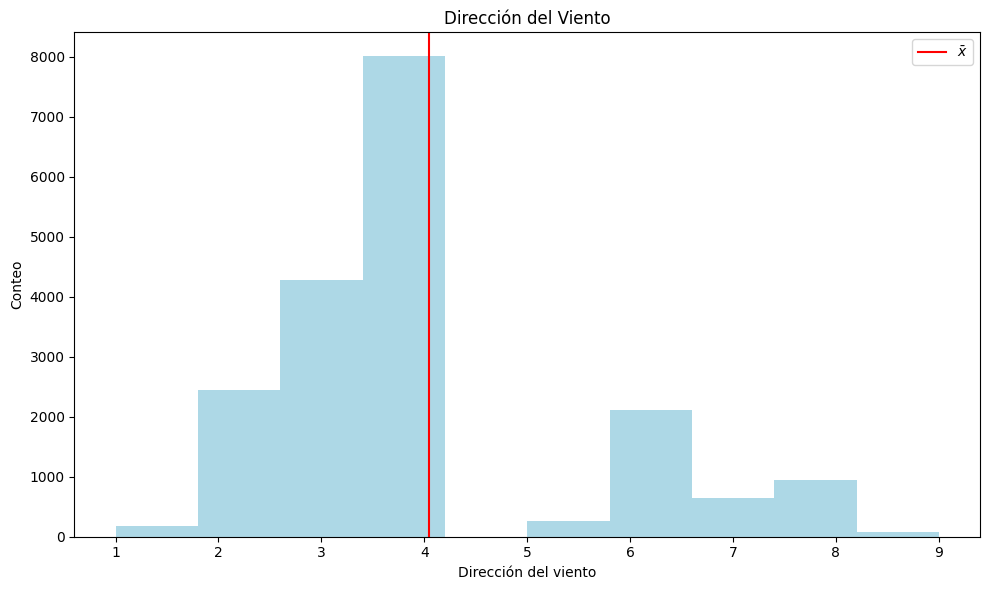

Media: 4.0428586509025655
Mediana: 4.0
Moda: [4]
Varianza Muestral: 2.486207377960705
Varianza Poblacional: 2.486076151982769
Desviación estándar Muestral: 1.5767711875731065
Desviación estándar Poblacional: 1.5767295747790009
Sesgo con respecto a la media muestral: 1.1360421106550685e-16
Sesgo con respecto a la media poblacional: 1.1361320597526016e-16
Cuartiles: {1: 3.0, 2: 4.0, 3: 4.0, 4: 9}


In [49]:
hist_plotting('Dirección del Viento', datosGeneracion['CodDirViento'], 'Dirección del viento', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['CodDirViento'].to_list())

Como se puede observar, este dato contradice completamente a lo que indica en grados la variable anterior, ya que aquí se indica que el viento va hacia el Sur, considerando esto, podemos quizá descartar estas opciones, nuevamente, no adelantaremos conclusiones hasta analizar más a fondo qué variable es más significativa para la Generación.

### Cobertura de Nubes

Esta columna es numérica y representa el porcentaje de 0 a 100 de la nubosidad en el cielo.

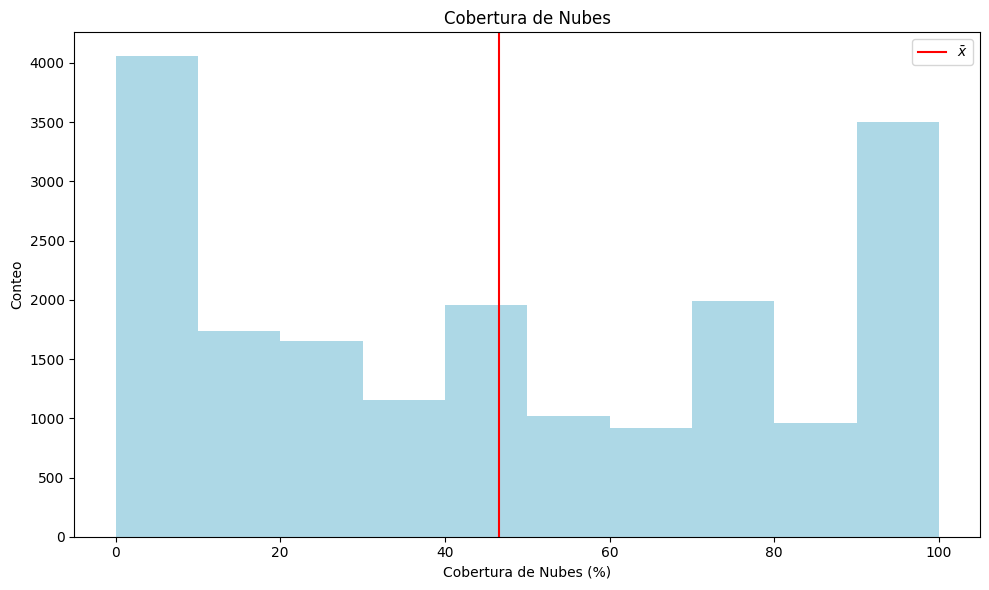

Media: 46.55922094373483
Mediana: 45.0
Moda: [0]
Varianza Muestral: 1223.571604861597
Varianza Poblacional: 1223.507022807081
Desviación estándar Muestral: 34.97958840326165
Desviación estándar Poblacional: 34.97866525193723
Sesgo con respecto a la media muestral: 2.2706889573651576e-24
Sesgo con respecto a la media poblacional: 2.2708687450865607e-24
Cuartiles: {1: 12.0, 2: 45.0, 3: 77.0, 4: 100}


In [50]:
hist_plotting('Cobertura de Nubes', datosGeneracion['CoberturaNubes'], 'Cobertura de Nubes (%)', 'Conteo', 10, 6)
Analisis_Descriptivo(datosGeneracion['CoberturaNubes'].to_list())

In [211]:
#Seleccionamos los datos solo que sean de la hora 15
generacion15 = generacion.loc[generacion['Hora'] == 15]
generacion15 = generacion15.drop(columns=['Hora'])
generacion15.head()

,Anio,Mes,Generacion,Temperatura,ProbabilidadLluvia,HumedadRelativa,VelocidadViento,DireccionViento,CoberturaNubes,IndiceUV,CodCondicionCielo,CodDireccionViento,VelocidadRafaga,Precipitacion,DPT,Dia,Fecha
15,2021,7,23890.9300,25.0,34,47.0,15.0,0.0,42.0,9.0,2,4,20.0,0.0,13.0,1,2021-07-01 15:00:00
39,2021,7,24864.4867,26.0,34,38.0,15.0,0.0,42.0,9.0,2,3,19.0,0.0,11.0,2,2021-07-02 15:00:00
63,2021,7,12529.4759,28.0,47,32.0,9.0,0.0,43.0,9.0,2,2,13.0,0.0,10.0,3,2021-07-03 15:00:00
87,2021,7,29865.6773,28.0,7,38.0,9.0,0.0,25.0,9.0,1,2,13.0,0.0,13.0,4,2021-07-04 15:00:00
111,2021,7,20075.6013,29.0,15,39.0,11.0,0.0,83.0,6.0,4,2,15.0,0.0,13.0,5,2021-07-05 15:00:00


In [231]:
#Seleccionamos las columnas que nos interesan analizar
list_of_plot = ['Generacion', 'Temperatura', 'ProbabilidadLluvia', 'HumedadRelativa', 'VelocidadViento',
                'DireccionViento', 'CoberturaNubes', 'IndiceUV', 'CodCondicionCielo', 'CodDireccionViento',
                'VelocidadRafaga', 'Precipitacion', 'DPT']

In [212]:
generacion15.corr()

,Anio,Mes,Generacion,Temperatura,ProbabilidadLluvia,HumedadRelativa,VelocidadViento,DireccionViento,CoberturaNubes,IndiceUV,CodCondicionCielo,CodDireccionViento,VelocidadRafaga,Precipitacion,DPT,Dia,Fecha
Anio,1.000000,-0.541626,0.135887,0.292502,-0.400159,-0.301981,0.283060,0.583508,-0.064881,0.168378,-0.259023,0.066531,0.116237,0.102440,-0.374362,-0.004989,0.927792
Mes,-0.541626,1.000000,-0.119151,-0.105448,0.094430,0.296570,-0.025972,-0.091604,0.039837,-0.115951,-0.008036,-0.143685,-0.174342,0.011719,0.273221,0.015842,-0.190558
Generacion,0.135887,-0.119151,1.000000,0.307327,-0.312083,-0.347057,0.038308,0.054351,-0.393750,0.244312,-0.424794,0.022667,0.009642,-0.096379,-0.156438,-0.015027,0.105163
Temperatura,0.292502,-0.105448,0.307327,1.000000,-0.121237,-0.632071,0.175153,0.187965,-0.211400,0.605093,-0.226327,0.154548,0.089986,-0.076469,-0.160886,-0.043034,0.291686
ProbabilidadLluvia,-0.400159,0.094430,-0.312083,-0.121237,1.000000,0.374703,-0.094614,-0.288335,0.283482,0.003692,0.528869,-0.060696,-0.059144,0.050223,0.331082,-0.009963,-0.425958
HumedadRelativa,-0.301981,0.296570,-0.347057,-0.632071,0.374703,1.000000,-0.004510,-0.257814,0.428362,-0.200591,0.373742,-0.366290,-0.044755,0.159620,0.640959,0.008651,-0.220721
VelocidadViento,0.283060,-0.025972,0.038308,0.175153,-0.094614,-0.004510,1.000000,0.218994,0.027800,0.240653,-0.088259,0.074817,0.795233,0.078277,0.039570,0.085878,0.321854
DireccionViento,0.583508,-0.091604,0.054351,0.187965,-0.288335,-0.257814,0.218994,1.000000,-0.036360,-0.108853,-0.243012,0.453216,-0.056560,0.020621,-0.519009,0.044220,0.642537
CoberturaNubes,-0.064881,0.039837,-0.393750,-0.211400,0.283482,0.428362,0.027800,-0.036360,1.000000,-0.356326,0.536231,-0.051293,0.006472,0.135698,0.219506,0.055266,-0.056264
IndiceUV,0.168378,-0.115951,0.244312,0.605093,0.003692,-0.200591,0.240653,-0.108853,-0.356326,1.000000,-0.096104,-0.099594,0.215545,-0.027902,0.145178,-0.006977,0.143920


array([[<Axes: xlabel='Anio', ylabel='Anio'>,
        <Axes: xlabel='Mes', ylabel='Anio'>,
        <Axes: xlabel='Generacion', ylabel='Anio'>,
        <Axes: xlabel='Temperatura', ylabel='Anio'>,
        <Axes: xlabel='ProbabilidadLluvia', ylabel='Anio'>,
        <Axes: xlabel='HumedadRelativa', ylabel='Anio'>,
        <Axes: xlabel='VelocidadViento', ylabel='Anio'>,
        <Axes: xlabel='DireccionViento', ylabel='Anio'>,
        <Axes: xlabel='CoberturaNubes', ylabel='Anio'>,
        <Axes: xlabel='IndiceUV', ylabel='Anio'>,
        <Axes: xlabel='CodCondicionCielo', ylabel='Anio'>,
        <Axes: xlabel='CodDireccionViento', ylabel='Anio'>,
        <Axes: xlabel='VelocidadRafaga', ylabel='Anio'>,
        <Axes: xlabel='Precipitacion', ylabel='Anio'>,
        <Axes: xlabel='DPT', ylabel='Anio'>,
        <Axes: xlabel='Dia', ylabel='Anio'>],
       [<Axes: xlabel='Anio', ylabel='Mes'>,
        <Axes: xlabel='Mes', ylabel='Mes'>,
        <Axes: xlabel='Generacion', ylabel='Mes'>,
     

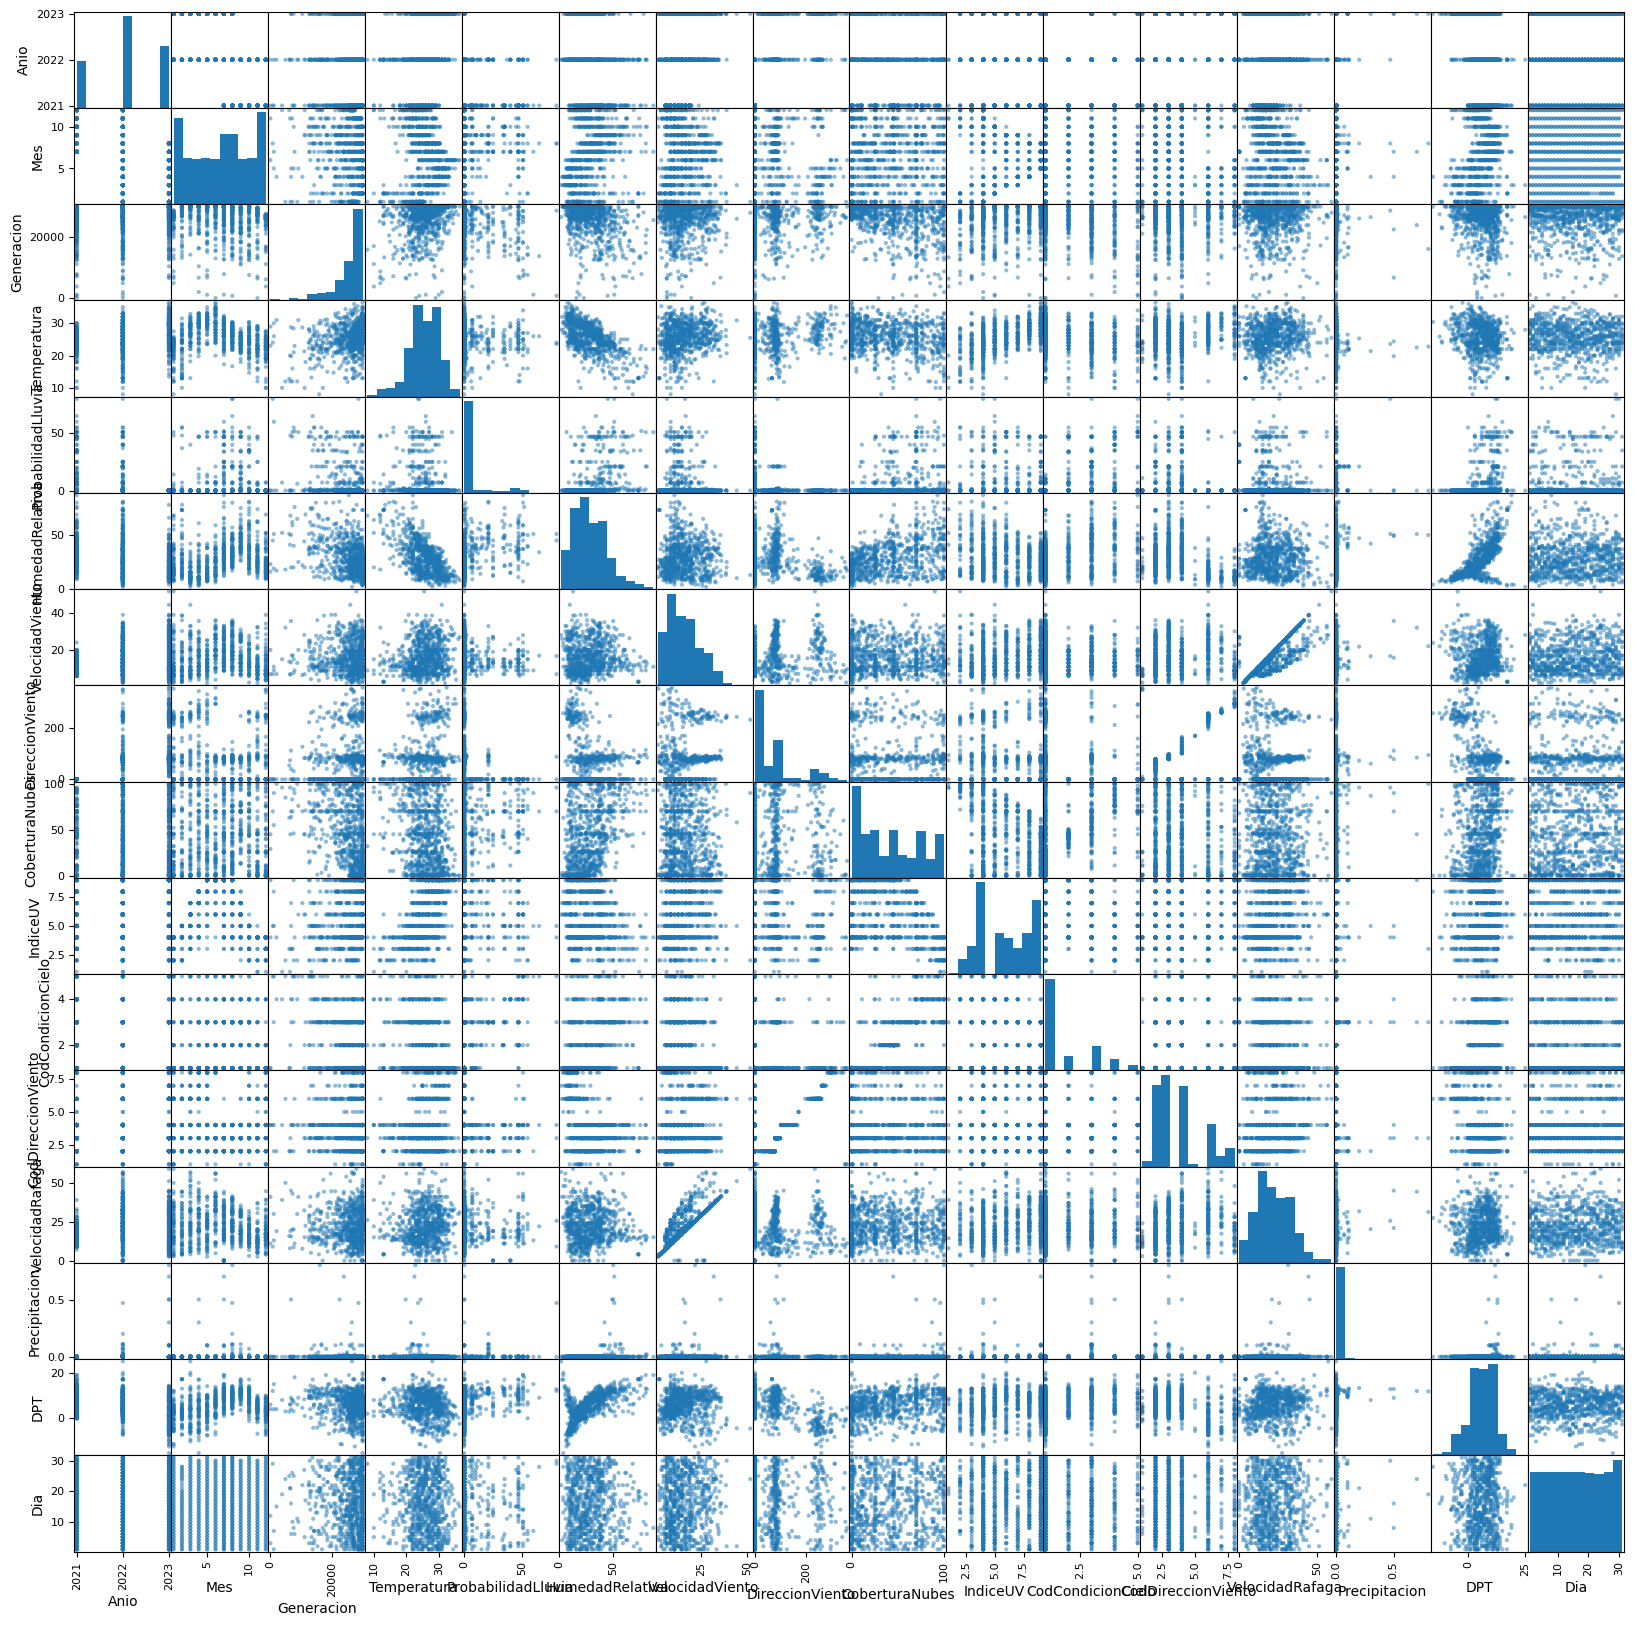

In [217]:
#Matriz de Dispersión
pd.plotting.scatter_matrix(generacion15, figsize=(20,20))

<Axes: >

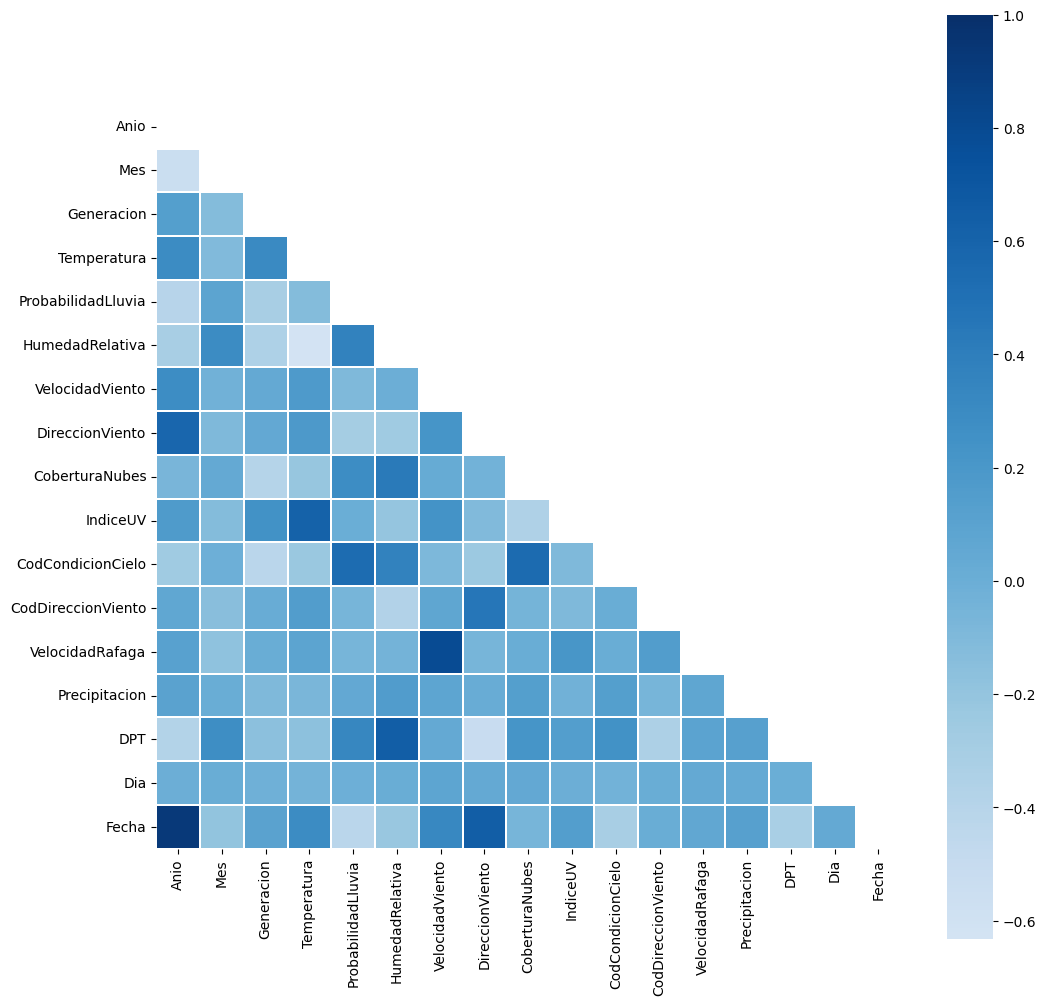

In [219]:
corr = generacion15.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=.1, annot=True)

Bajo las muestras de correlación entre variables, las que cabe resaltar son la Velocidad de Ráfaga vs la Velocidad del Viento, el índice UV vs la Temperatura, la Condición del Cielo vs la Humedad Relativa, etc. Ahora, procederemos a analizar cada una de las variables.

### Generación

Análisis de: Generacion


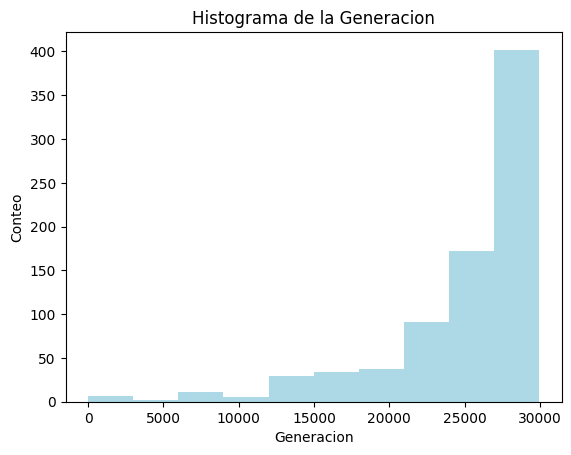

Media: 25303.73882395435
Mediana: 27061.1672
Moda: [29898.6824, 0.0]
Varianza Muestral: 30797205.93940884
Varianza Poblacional: 30758172.72529045
Desviación estándar Muestral: 5549.523037109481
Desviación estándar Poblacional: 5546.005114069987
Sesgo con respecto a la media muestral: -1.626833654651717e-34
Sesgo con respecto a la media poblacional: -1.6299314014911224e-34
Cuartiles: {1: 23587.3111, 2: 27061.1672, 3: 29495.7113, 4: 29954.0041}
---------------------------------------------------------------------
Análisis de: Temperatura


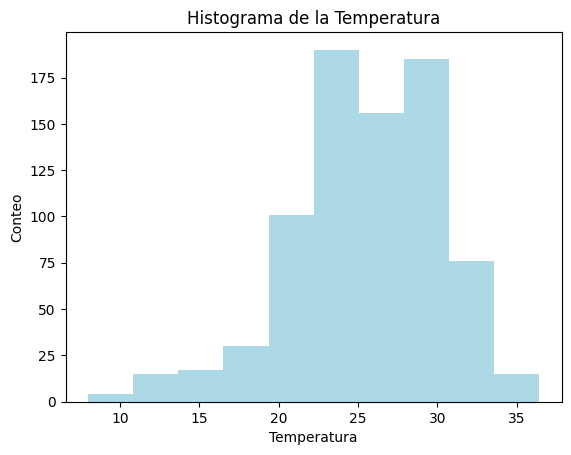

Media: 25.588212927756658
Mediana: 26.0
Moda: [24.0]
Varianza Muestral: 20.810152766787013
Varianza Poblacional: 20.783777414737852
Desviación estándar Muestral: 4.561814635294492
Desviación estándar Poblacional: 4.558922834918119
Sesgo con respecto a la media muestral: -1.1328076296801544e-15
Sesgo con respecto a la media poblacional: -1.1349646733609651e-15
Cuartiles: {1: 23.0, 2: 26.0, 3: 29.0, 4: 36.4}
---------------------------------------------------------------------
Análisis de: ProbabilidadLluvia


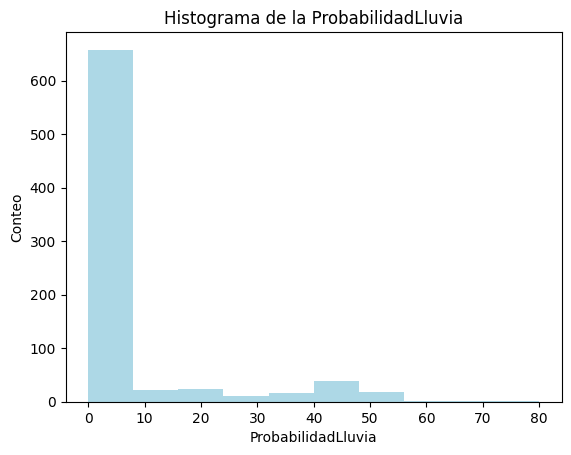

Media: 6.079847908745247
Mediana: 0
Moda: [0]
Varianza Muestral: 204.4415857636347
Varianza Poblacional: 204.1824709527809
Desviación estándar Muestral: 14.298307094325352
Desviación estándar Poblacional: 14.289243190343598
Sesgo con respecto a la media muestral: 5.753777911806846e-19
Sesgo con respecto a la media poblacional: 5.764734008817733e-19
Cuartiles: {1: 0, 2: 0, 3: 0, 4: 80}
---------------------------------------------------------------------
Análisis de: HumedadRelativa


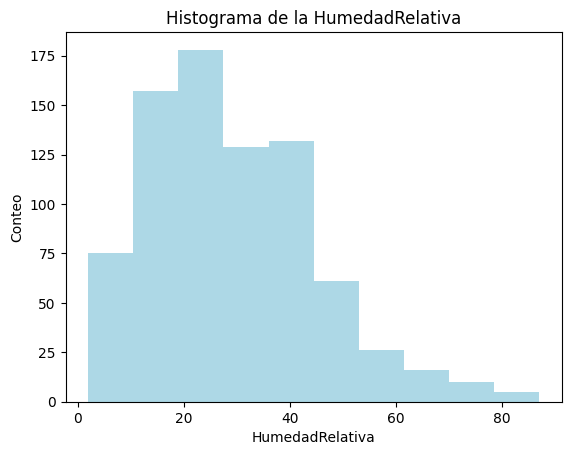

Media: 28.809632446134348
Mediana: 27.0
Moda: [20.0]
Varianza Muestral: 241.09005938249936
Varianza Poblacional: 240.78449530216665
Desviación estándar Muestral: 15.527075042727763
Desviación estándar Poblacional: 15.517232204944497
Sesgo con respecto a la media muestral: 1.0424161277142878e-18
Sesgo con respecto a la media poblacional: 1.0444010517756636e-18
Cuartiles: {1: 17.0, 2: 27.0, 3: 38.0, 4: 87.0}
---------------------------------------------------------------------
Análisis de: VelocidadViento


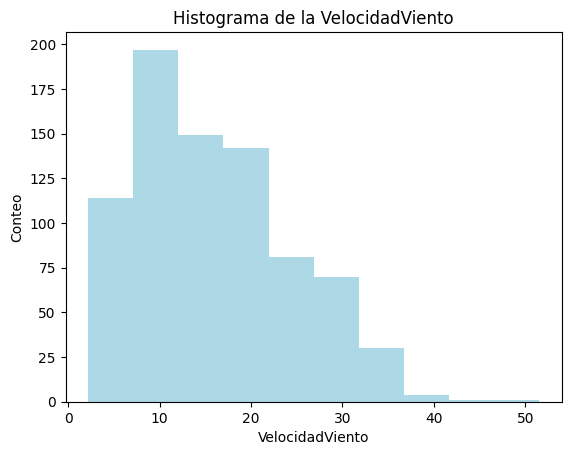

Media: 16.064512040557688
Mediana: 15.0
Moda: [9.0]
Varianza Muestral: 67.05764763595896
Varianza Poblacional: 66.97265695454456
Desviación estándar Muestral: 8.188873404562983
Desviación estándar Poblacional: 8.183682359093892
Sesgo con respecto a la media muestral: 5.818338435919872e-17
Sesgo con respecto a la media poblacional: 5.829417466310552e-17
Cuartiles: {1: 9.0, 2: 15.0, 3: 20.9, 4: 51.5}
---------------------------------------------------------------------
Análisis de: DireccionViento


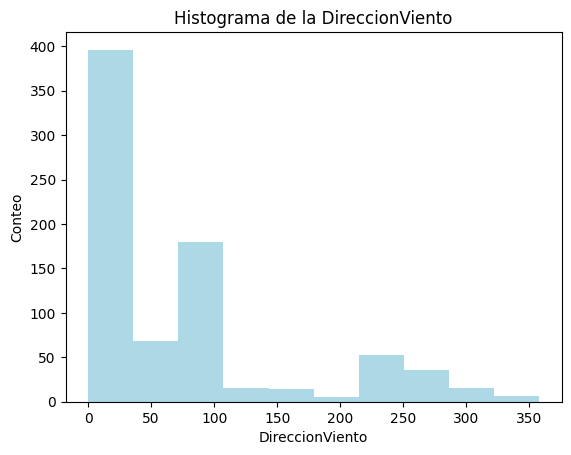

Media: 67.80887198986058
Mediana: 33.0
Moda: [0.0]
Varianza Muestral: 8034.638246060981
Varianza Poblacional: 8024.454927624909
Desviación estándar Muestral: 89.63614363671041
Desviación estándar Poblacional: 89.57932198685648
Sesgo con respecto a la media muestral: 5.789820235367111e-23
Sesgo con respecto a la media poblacional: 5.800844962623987e-23
Cuartiles: {1: 0.0, 2: 33.0, 3: 87.0, 4: 358.0}
---------------------------------------------------------------------
Análisis de: CoberturaNubes


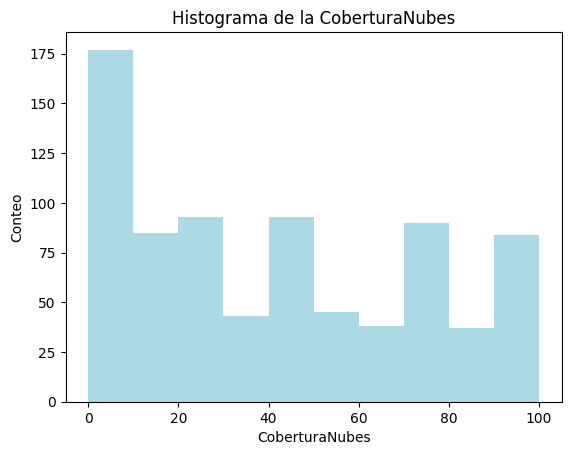

Media: nan
Mediana: 0.0
Moda: [0.0]
Varianza Muestral: nan
Varianza Poblacional: nan
Desviación estándar Muestral: nan
Desviación estándar Poblacional: nan
Sesgo con respecto a la media muestral: nan
Sesgo con respecto a la media poblacional: nan
Cuartiles: {1: 45.0, 2: 0.0, 3: 41.0, 4: 100.0}
---------------------------------------------------------------------
Análisis de: IndiceUV


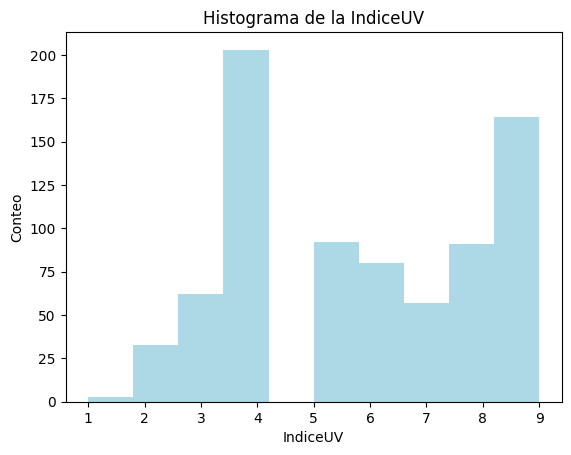

Media: nan
Mediana: 5.0
Moda: [4.0]
Varianza Muestral: nan
Varianza Poblacional: nan
Desviación estándar Muestral: nan
Desviación estándar Poblacional: nan
Sesgo con respecto a la media muestral: nan
Sesgo con respecto a la media poblacional: nan
Cuartiles: {1: 4.0, 2: 5.0, 3: 8.0, 4: 9.0}
---------------------------------------------------------------------
Análisis de: CodCondicionCielo


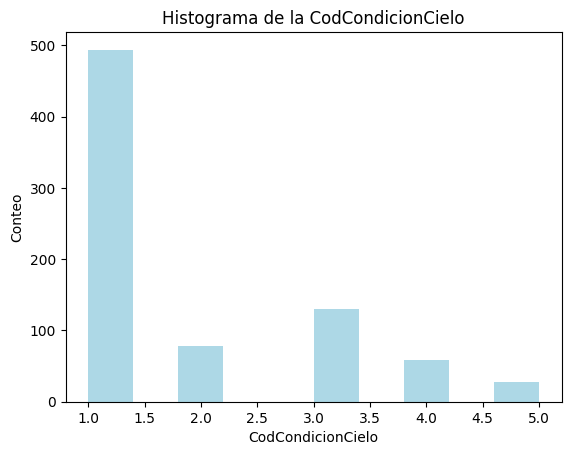

Media: 1.7946768060836502
Mediana: 1
Moda: [1]
Varianza Muestral: 1.3689563992202227
Varianza Poblacional: 1.367221346749728
Desviación estándar Muestral: 1.170024101982614
Desviación estándar Poblacional: 1.1692824067562668
Sesgo con respecto a la media muestral: 1.3615835680708113e-11
Sesgo con respecto a la media poblacional: 1.3641762370769619e-11
Cuartiles: {1: 1, 2: 1, 3: 3, 4: 5}
---------------------------------------------------------------------
Análisis de: CodDireccionViento


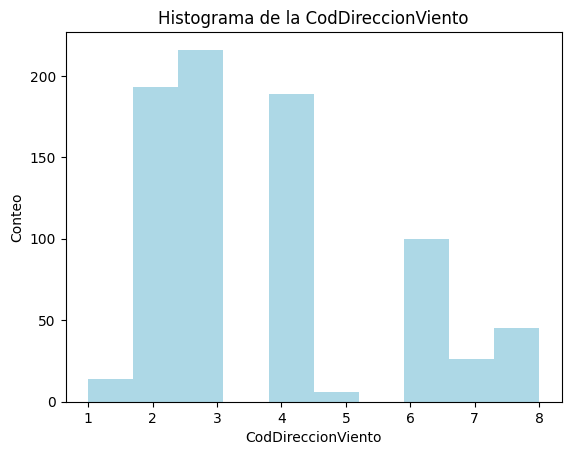

Media: 3.7718631178707223
Mediana: 3
Moda: [3]
Varianza Muestral: 3.087481422863879
Varianza Poblacional: 3.0835682651669662
Desviación estándar Muestral: 1.7571230528519848
Desviación estándar Poblacional: 1.7560091870964019
Sesgo con respecto a la media muestral: 1.4278096508816038e-12
Sesgo con respecto a la media poblacional: 1.4305284247529493e-12
Cuartiles: {1: 2, 2: 3, 3: 4, 4: 8}
---------------------------------------------------------------------
Análisis de: VelocidadRafaga


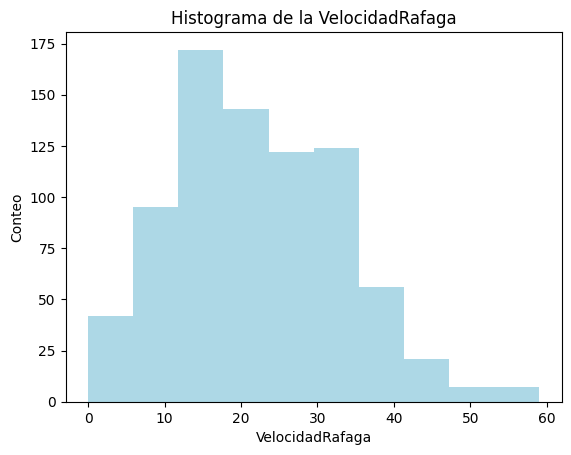

Media: 22.155259822560172
Mediana: 20.4
Moda: [15.0]
Varianza Muestral: 119.36752623316796
Varianza Poblacional: 119.21623659282174
Desviación estándar Muestral: 10.925544665286393
Desviación estándar Poblacional: 10.91861880426374
Sesgo con respecto a la media muestral: 9.083555849574413e-18
Sesgo con respecto a la media poblacional: 9.100852366857009e-18
Cuartiles: {1: 14.4, 2: 20.4, 3: 30.0, 4: 59.0}
---------------------------------------------------------------------
Análisis de: Precipitacion


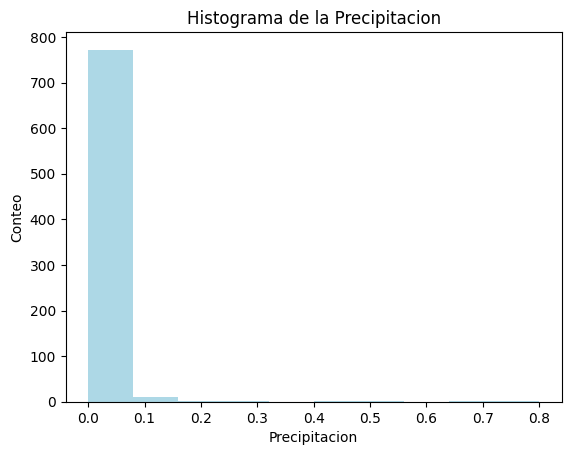

Media: 0.006210392902408112
Mediana: 0.0
Moda: [0.0]
Varianza Muestral: 0.002633463292865733
Varianza Poblacional: 0.002630125570061087
Desviación estándar Muestral: 0.05131728064566295
Desviación estándar Poblacional: 0.05128474987811764
Sesgo con respecto a la media muestral: 2.7616713741013617e-07
Sesgo con respecto a la media poblacional: 2.766930030231407e-07
Cuartiles: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.8}
---------------------------------------------------------------------
Análisis de: DPT


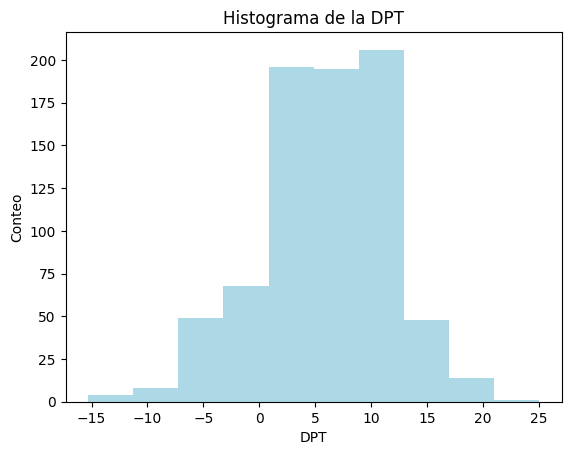

Media: 5.728593155893538
Mediana: 6.0
Moda: [3.0]
Varianza Muestral: 31.25740525178049
Varianza Poblacional: 31.217788768571644
Desviación estándar Muestral: 5.590832250370287
Desviación estándar Poblacional: 5.587288140822133
Sesgo con respecto a la media muestral: -3.4295162088523977e-16
Sesgo con respecto a la media poblacional: -3.4360465464602337e-16
Cuartiles: {1: 2.1, 2: 6.0, 3: 10.0, 4: 25.0}
---------------------------------------------------------------------


In [232]:
for variable in list_of_plot:
    print('Análisis de: ' + variable)
    plt.figure(figsize=(6.4, 4.8))
    plt.hist(generacion15[variable].values, color="lightblue")
    plt.title("Histograma de la " + variable)
    plt.xlabel(variable)
    plt.ylabel("Conteo")
    plt.show()
    analisis_var = generacion15[variable].tolist()
    Analisis_Descriptivo(analisis_var)
    print('---------------------------------------------------------------------')